In [1]:
%pip install openpyxl
import pandas as pd 

sh = pd.read_excel('D:\DATA\College\SMT_8\DATA\data800_13-07.xlsx')
print(sh.shape)
data = sh.copy()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(854, 14)


In [2]:
data = data.dropna()
data.drop(["presentase_lux", "lux_score", "temp_score", "humid_score", "lux_category", "temp_category", "humid_category", "quality_score"], axis=1, inplace=True)
print(data.shape)
print(data.columns)

(854, 6)
Index(['Date', 'Time', 'lux', 'temp', 'humid', 'quality_category'], dtype='object')


In [3]:
data['quality_category'].unique()

array(['Cukup', 'Kurang', 'Baik'], dtype=object)

In [4]:
print(data.describe())
print(data.isnull().sum())
print(data.dtypes)

                                Date           lux        temp       humid
count                            854    854.000000  854.000000  854.000000
mean   2024-07-11 15:05:28.805620736  13450.695398   23.539696   64.442155
min              2024-07-10 00:00:00      0.000000   12.800000   20.200000
25%              2024-07-11 00:00:00      0.000000   16.900000   39.700000
50%              2024-07-12 00:00:00     19.585000   20.500000   78.150000
75%              2024-07-12 00:00:00  23091.042500   30.800000   83.800000
max              2024-07-13 00:00:00  54612.500000   40.000000   87.600000
std                              NaN  20239.219997    8.098591   22.947525
Date                0
Time                0
lux                 0
temp                0
humid               0
quality_category    0
dtype: int64
Date                datetime64[ns]
Time                        object
lux                        float64
temp                       float64
humid                      float64
quali


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


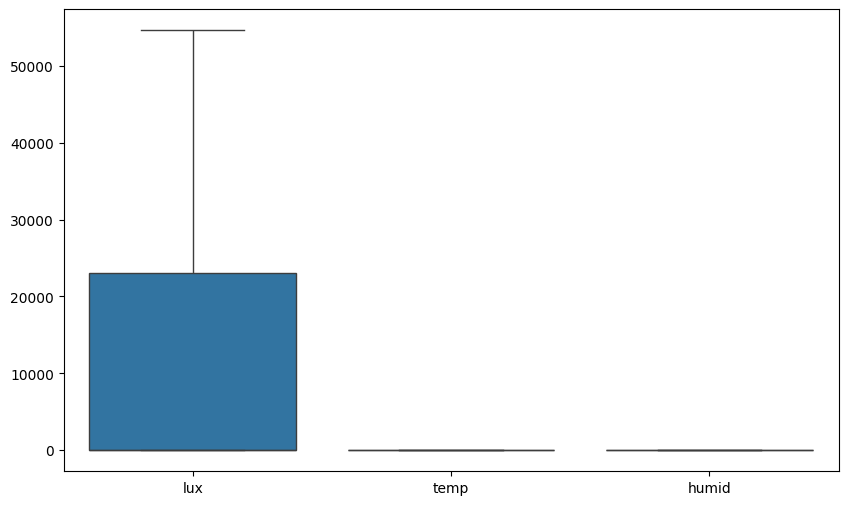

In [5]:
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

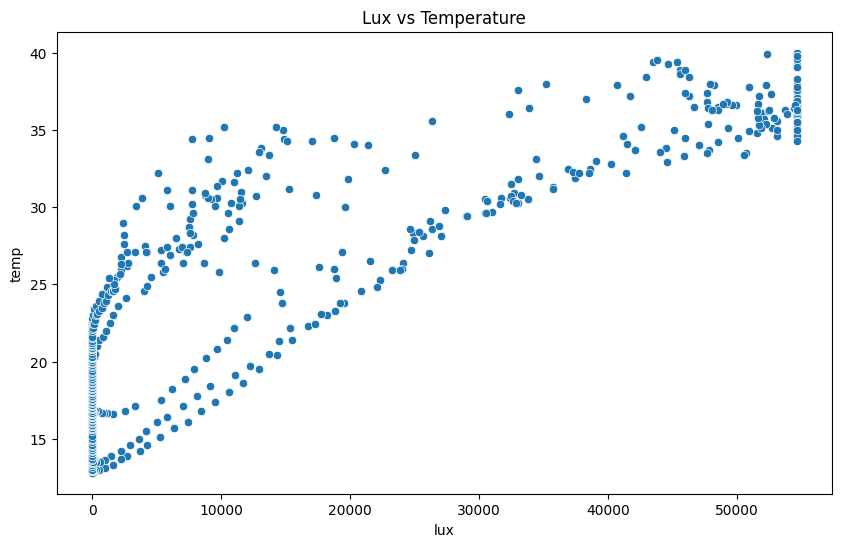

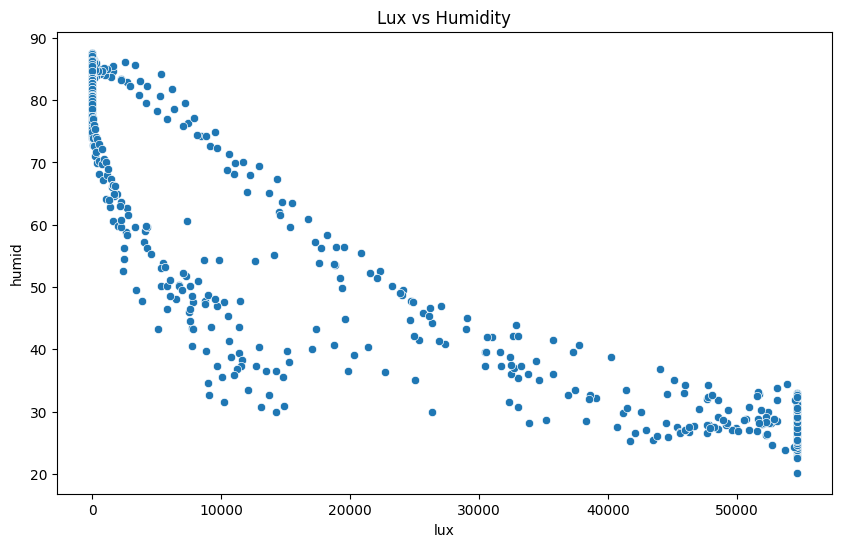

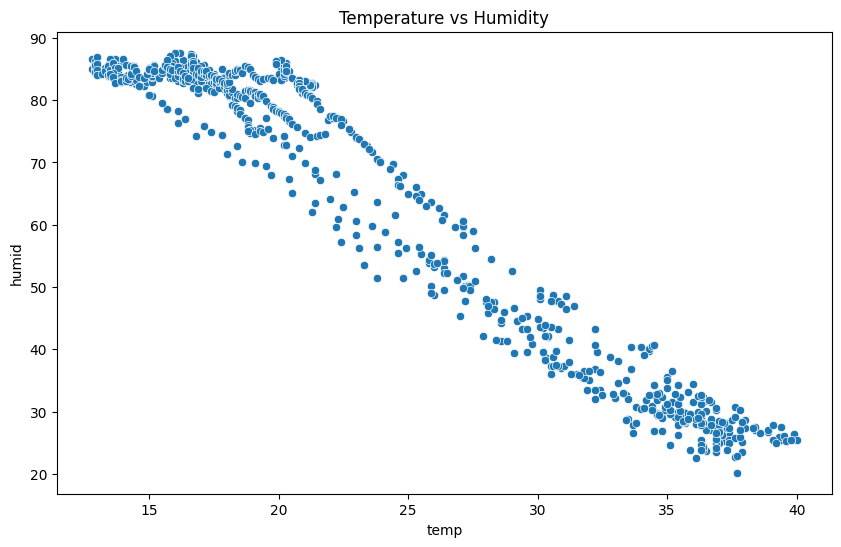

In [6]:
# Scatter plot antara lux dan temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lux', y='temp', data=data)
plt.title('Lux vs Temperature')
plt.show()

# Scatter plot antara lux dan humid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lux', y='humid', data=data)
plt.title('Lux vs Humidity')
plt.show()

# Scatter plot antara temp dan humid
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='humid', data=data)
plt.title('Temperature vs Humidity')
plt.show()

# # Scatter plot antara lux dan lux_score
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='lux', y='lux_score', data=data)
# plt.title('Lux vs Lux Score')
# plt.show()

# # Scatter plot antara temp dan temp_score
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='temp', y='temp_score', data=data)
# plt.title('Temperature vs Temperature Score')
# plt.show()

# # Scatter plot antara humid dan humid_score
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='humid', y='humid_score', data=data)
# plt.title('Humidity vs Humidity Score')
# plt.show()



In [7]:
import numpy as np
from scipy.stats import zscore

# Menghitung z-score
# z_scores = np.abs(zscore(data[['lux', 'temp', 'humid', 'lux_score', 'temp_score', 'humid_score']]))
z_scores = np.abs(zscore(data[['lux', 'temp', 'humid']]))
treshold = 2.5
outliers = np.where(z_scores > treshold)

# Menghapus outliers
print("Outliers before removing: ")
print(data.iloc[outliers[0]])

Outliers before removing: 
Empty DataFrame
Columns: [Date, Time, lux, temp, humid, quality_category]
Index: []


In [8]:
import pandas as pd

# Pastikan nilai unik dalam kolom quality_category
print(data["quality_category"].unique())

# Mengganti label kategori dengan angka
data["quality_category"][data["quality_category"] == "Sangat Baik"] = 4
data["quality_category"][data["quality_category"] == "Baik"] = 3
data["quality_category"][data["quality_category"] == "Cukup"] = 2
data["quality_category"][data["quality_category"] == "Kurang"] = 1

# Pastikan tipe data menjadi numerik
data["quality_category"] = data["quality_category"].astype(int)

# Periksa kembali nilai unik untuk memastikan konversi benar
print(data["quality_category"].unique())


['Cukup' 'Kurang' 'Baik']
[2 1 3]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26696\3233035365.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["quality_category"][data["quality_category"] == "Sangat Baik"] = 4
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26696\3233

In [9]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].astype('int64') // 10**9

# Memeriksa dan menangani nilai di kolom Time
def convert_time_to_seconds(time):
    if isinstance(time, pd._libs.tslibs.nattype.NaTType):
        return 0
    try:
        return time.hour * 3600 + time.minute * 60 + time.second
    except AttributeError:
        return 0

data['Time'] = data['Time'].apply(convert_time_to_seconds)

In [10]:
print(data.dtypes)

Date                  int64
Time                  int64
lux                 float64
temp                float64
humid               float64
quality_category      int32
dtype: object


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Inisialisasi encoder
# encoder = LabelEncoder()
# data['quality_category_encoded'] = encoder.fit_transform(data['quality_category'])

# # Mendapatkan mapping label ke nilai numerik
# label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
# print("Label Mapping:", label_mapping)

# # # Mendapatkan mapping nilai numerik ke label
# # inverse_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
# # print("Inverse Mapping:", inverse_mapping)

# # # Contoh mendapatkan label asli dari nilai numerik
# # original_labels = encoder.inverse_transform([0, 1, 2])
# # print("Original Labels:", original_labels)

# # Pastikan tipe data menjadi numerik
# data["quality_category"] = data["quality_category"].astype(int)



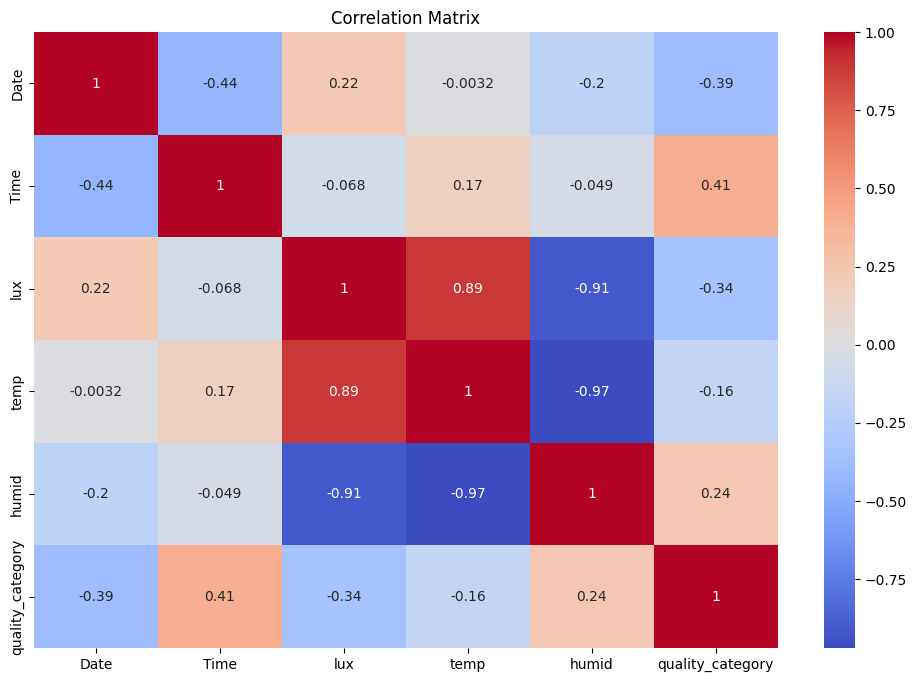

In [11]:
# Korelasi matrix

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

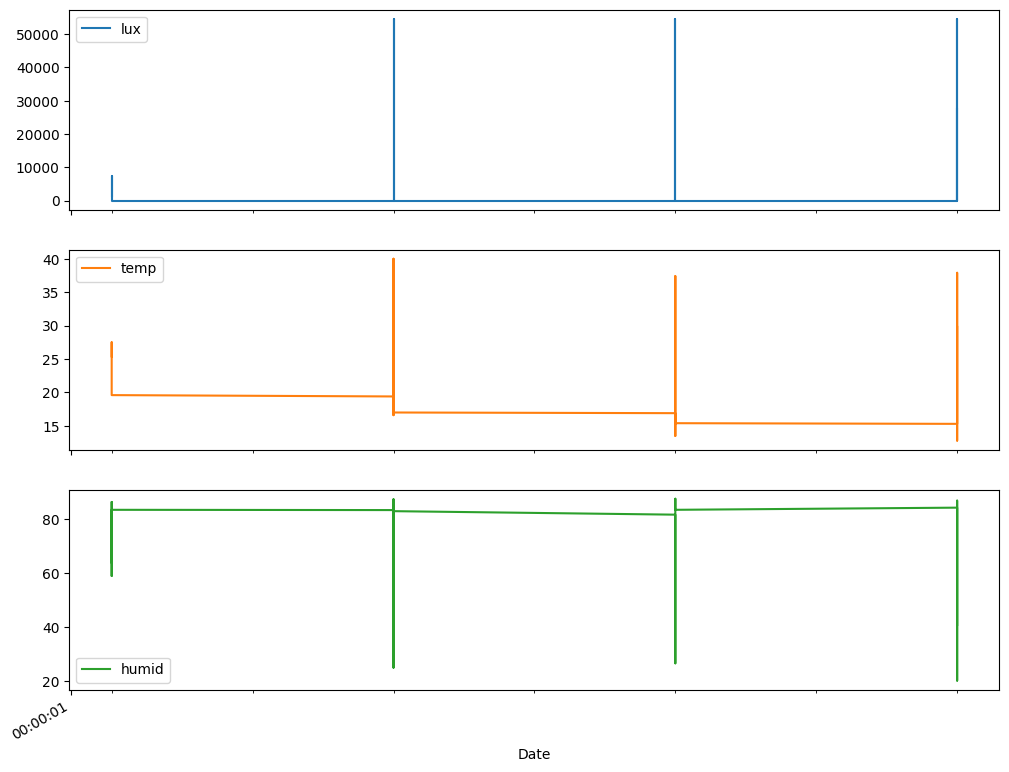

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot tren waktu
data[['lux', 'temp', 'humid']].plot(subplots=True, figsize=(12, 10))
plt.show()

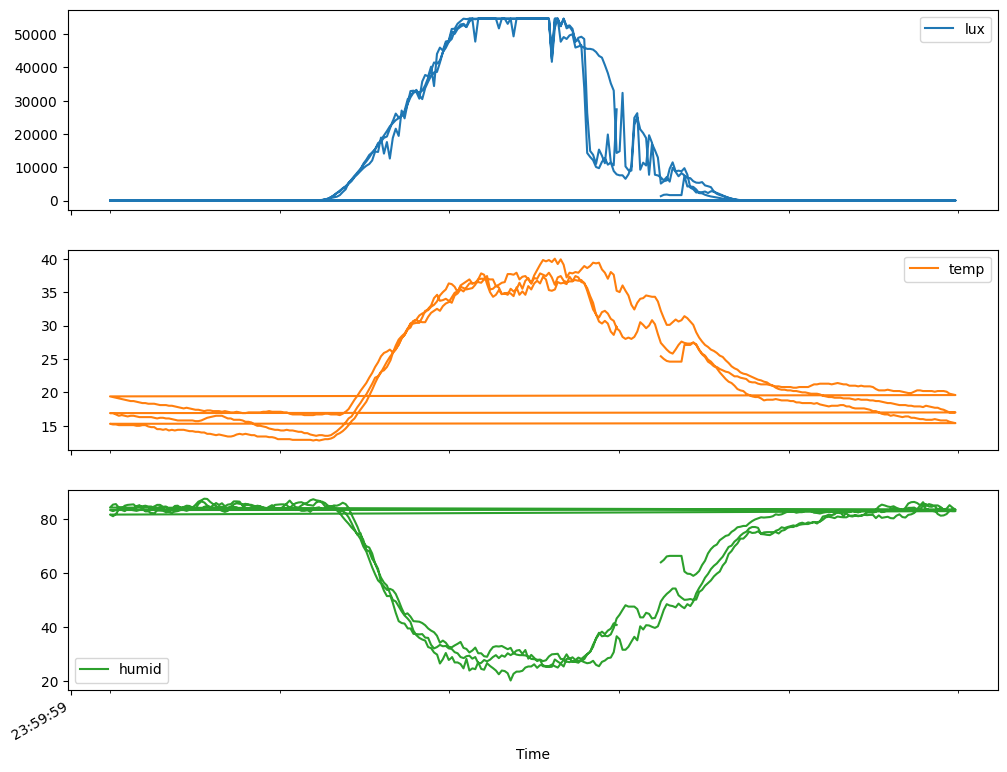

In [13]:
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Plot tren waktu
data[['lux', 'temp', 'humid']].plot(subplots=True, figsize=(12, 10))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Memisahkan atribut dan label
X = data.drop('quality_category', axis=1)
y = data['quality_category']

# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label Encoder
encoder = LabelEncoder()
y_train_encode = encoder.fit_transform(y_train)
y_test_encode = encoder.transform(y_test)

# Mendapatkan mapping nilai numerik ke label
inverse_mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))
print("Inverse Mapping:", inverse_mapping)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_encode.shape, y_test_encode.shape)

Inverse Mapping: {0: 1, 1: 2, 2: 3}
(683, 3) (171, 3) (683,) (171,)


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Membuat model
model = MLPClassifier(hidden_layer_sizes=(100,100,100), 
                        activation='relu',
                        solver='adam',
                        max_iter=1000,
                        learning_rate_init=0.001,
                        random_state=42)

# Melatih model
model.fit(X_train_scaled, y_train_encode)

# Membuat prediksi
y_train_pred = model.predict(X_train_scaled)
train_accuracy = model.score(X_train_scaled, y_train_encode)
print('Training accuracy: ', train_accuracy)

y_test_pred = model.predict(X_test_scaled)
test_accuracy = model.score(X_test_scaled, y_test_encode)
print('Test accuracy: ', test_accuracy)


Training accuracy:  0.9824304538799414
Test accuracy:  0.9766081871345029


In [16]:
from sklearn.model_selection import cross_val_score

# Cross validation
cv_scores = cross_val_score(model, X_train_scaled, y_train_encode, cv=5)
print('CV scores: ', cv_scores)
print('CV accuracy: ', cv_scores.mean())


CV scores:  [0.96350365 0.97810219 0.98540146 0.97794118 0.97058824]
CV accuracy:  0.9751073422069558


[learning_curve] Training set sizes: [  5  16  27  38  49  60  71  82  93 104 115 126 137 148 159 170 181 192
 204 215 226 237 248 259 270 281 292 303 314 325 336 347 358 369 380 391
 402 413 424 435 446 457 468 479 490 501 512 523 534 546]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   44.8s finished


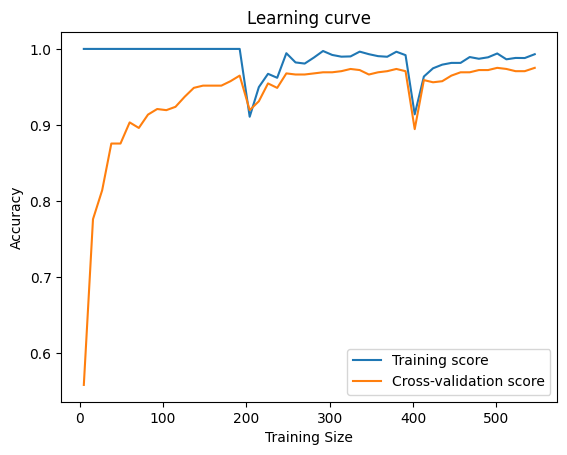

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train_encode, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung evaluasi model
accuracy = accuracy_score(y_test_encode, y_test_pred)
precision = precision_score(y_test_encode, y_test_pred, average='weighted')
recall = recall_score(y_test_encode, y_test_pred, average='weighted')
f1 = f1_score(y_test_encode, y_test_pred, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Accuracy:  0.9766081871345029
Precision:  0.9766081871345029
Recall:  0.9766081871345029
F1 Score:  0.9766081871345029


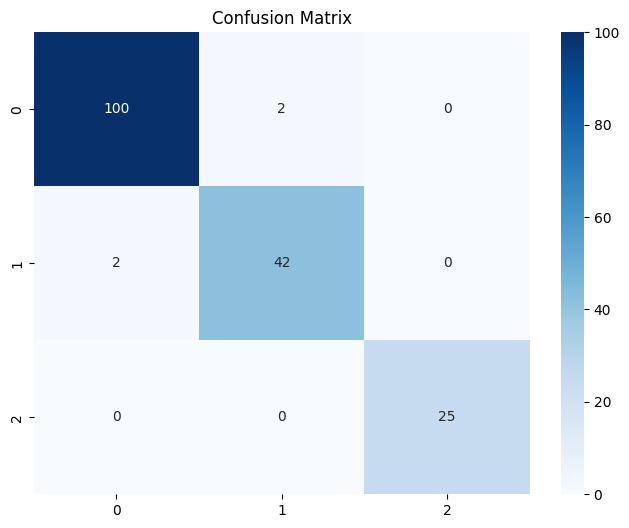

In [19]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test_encode, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.metrics import classification_report

# Membuat classification report
class_report = classification_report(y_test_encode, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.95      0.95      0.95        44
           2       1.00      1.00      1.00        25

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [21]:
import joblib
import os

# Simpan model
save_path = 'D:\DATA\College\SMT_8\DATA\chemato-weather-model.pkl'
joblib.dump(model, save_path)

['D:\\DATA\\College\\SMT_8\\DATA\\chemato-weather-model.pkl']

In [22]:
# Load model

loaded_model = joblib.load(save_path)
result_pred = loaded_model.predict(X_test_scaled)
print(result_pred)
result_score = loaded_model.score(X_test_scaled, y_test_encode)
print(result_score)

[0 0 2 0 0 1 0 0 0 0 1 0 2 2 0 0 2 1 0 1 0 0 1 0 1 0 0 0 1 0 0 2 0 0 0 0 1
 0 0 2 0 0 0 1 0 0 2 2 0 1 0 1 2 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1
 0 1 1 1 2 0 0 1 2 0 0 0 2 1 1 0 2 0 0 0 1 1 0 0 2 0 0 2 0 2 1 1 2 0 1 0 0
 1 0 0 1 2 0 0 0 0 1 0 0 1 0 0 1 0 2 0 1 1 0 0 0 2 0 0 1 0 2 0 0 0 1 0 2 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 0 0 1]
0.9766081871345029
